<a href="https://colab.research.google.com/github/YYK31/Retail-Sales-Prediction-of-Rossmann/blob/main/Retail_sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Retail Sales Prediction of Rossmann**

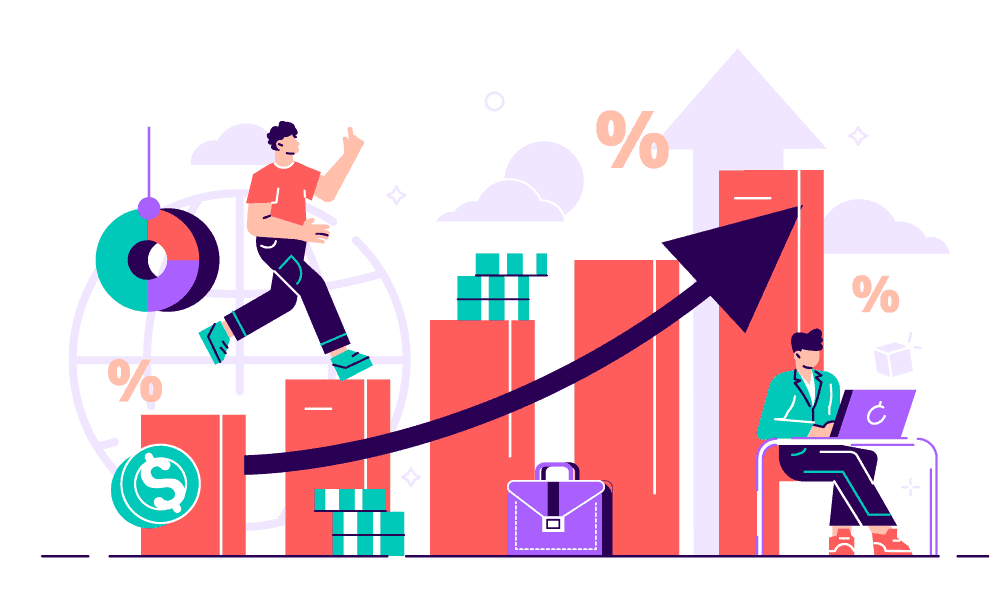

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**    YASH KAMBLE

# **Github Link**    -   **Retail Sales Prediction of Rossmann**

# **Project Summary**



### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### **<b>Data fields</b>**
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#### **Business Objective** 

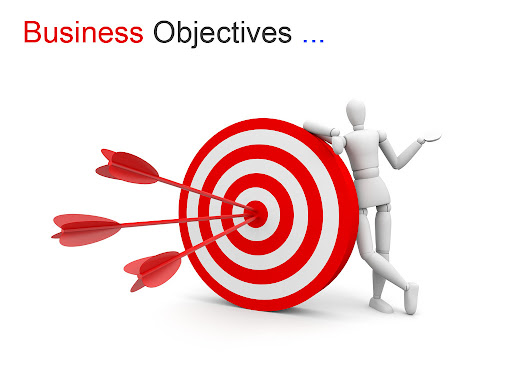

The objective of this Project is to use historical sales data and store information to forecast future sales for Rossmann stores. The goal is to predict the "Sales" column for a given test set, taking into account various factors such as promotions, competition, holidays, and store characteristics. The accuracy of the predictions can have a significant impact on the company's ability to plan inventory, staffing, and other resources effectively, and ultimately improve efficiency and profitability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing all the required libraries for the data exploration
#-----------------------------------------------------------------
# import Numpy. It consists of Single dimentional array & Multi-dimensional array object.
import numpy as np
# import Pandas. It consists of single and multi- dimensional data struture for data manipulation. 
import pandas as pd
# import matplotlib. Matplotlib is a python libraray used for data visualization 
from matplotlib import pyplot as plt
%matplotlib inline
# import seaborn . Seaborn is a python libraray used for data visualization
import seaborn as sns

### Dataset Loading

In [3]:
# Give Google Access to Your Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Declare the path of mydrive
path='/content/drive/MyDrive/'

In [5]:
# loading the r_s_df dataset
r_s_df=pd.read_csv("/content/drive/MyDrive/aba/Rossmann Stores Data (1).csv")
# loading the s_df dataset
s_df=pd.read_csv("/content/drive/MyDrive/aba/store.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


###Explore and analyze the data to discover results and statistics for Rossmann Sales Prediction

### Dataset First View

In [6]:
# having a glance of top 5 record of the Rossmann Store Dataset
r_s_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# having a glance of below 5 record of the Rossmann Store Dataset
r_s_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# having a glance of top 5 record of the Store Dataset
s_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# having a glance of below 5 record of the Store Dataset
s_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [ ]:
# Looking at the number of rows and coloums in the Rossmann store dataset
r_s_df.shape

(1017209, 9)

In [ ]:
# Looking at the number of rows and coloums in the Rossmann store dataset
s_df.shape

(1115, 10)

### Dataset Information

In [ ]:
# getting information of Rossmann Store dataset
r_s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# getting information of Store dataset
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## ***2. Understanding Your Variables***

###Statistics

In [ ]:
# Dataset Columns
r_s_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# get statistics information of data
r_s_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Dataset Columns
s_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# get statistics information of data
s_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# dropping date column
unique_df1=r_s_df.drop(['Date'], axis=1)

In [ ]:
# Check the Unique Values of variable.
print("Unique values of columns: \n")
for i in unique_df1 :
  print(f'Unique values of {i} column ======= {unique_df1[i].unique()}')

Unique values of columns: 

Unique values of Store column ======= [   1    2    3 ... 1113 1114 1115]
Unique values of DayOfWeek column ======= [5 4 3 2 1 7 6]
Unique values of Sales column ======= [ 5263  6064  8314 ...   660 17815 23303]
Unique values of Customers column ======= [ 555  625  821 ... 3900   36 4065]
Unique values of Open column ======= [1 0]
Unique values of Promo column ======= [1 0]
Unique values of StateHoliday column ======= ['0' 'a' 'b' 'c' 0]
Unique values of SchoolHoliday column ======= [1 0]


In [ ]:
# Dropping Compititiondistancs column
unique_df2=s_df.drop(['CompetitionDistance'], axis=1)

In [ ]:
# Check the Unique Values of variable.
print("Unique values of columns: \n")
for i in unique_df2 :
  print(f'Unique values of {i} column ======= {unique_df2[i].unique()}')

Unique values of columns: 

Unique values of Store column ======= [   1    2    3 ... 1113 1114 1115]
Unique values of StoreType column ======= ['c' 'a' 'd' 'b']
Unique values of Assortment column ======= ['a' 'c' 'b']
Unique values of CompetitionOpenSinceMonth column ======= [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values of CompetitionOpenSinceYear column ======= [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values of Promo2 column ======= [0 1]
Unique values of Promo2SinceWeek column ======= [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values of Promo2SinceYear column ======= [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values of PromoInterval column ======= [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


## 3. ***Data Wrangling***

### Data Wrangling Code

#### Duplicate Values

In [ ]:
# cheaking the duplicates values in Rossmann store dataset
r_s_df.duplicated().sum()

0

In [ ]:
# cheaking the duplicates values in store dataset
s_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# cheaking the null values in Rossmann store Dataset
r_s_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

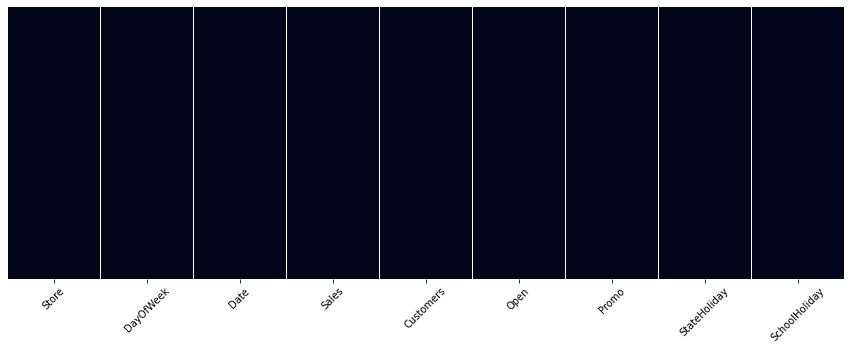

In [ ]:
# visualization of null values 
plt.figure(figsize=(15,5))
sns.heatmap(r_s_df.isnull(), cbar=False, yticklabels=False, cmap='rocket')
# Rotate the x-axis tick labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
# cheaking the null values in store Dataset
s_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

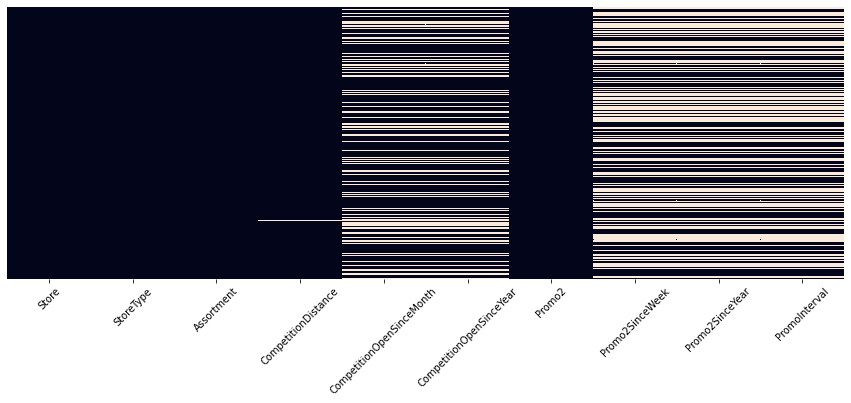

In [ ]:
# visualization of null values 
plt.figure(figsize=(15,5))
sns.heatmap(s_df.isnull(), cbar=False, yticklabels=False, cmap='rocket')
# Rotate the x-axis tick labels
plt.xticks(rotation=45)
plt.show()

Above Store dataset have many Null values.

Such as

1. **CompetitionDistance**
2. **CompetitionOpenSinceMonth**
3. **CompetitionOpenSinceYear**
4. **Promo2SinceWeek**
5. **Promo2SinceYear**
6. **PromoInterval**

Our Task is fill/Remove these Null values OR clean those Data

In [ ]:
# Get median of competitionDistance
s_df['CompetitionDistance'].fillna(s_df['CompetitionDistance'].median(), inplace= True)

In [ ]:
# create a copy of s_df and stored in new variable s1_df
s1_df=s_df.copy()

In [ ]:
# Replacing Null values with 0 in CompetitionOpenSinceMonth 
s1_df['CompetitionOpenSinceMonth'] = s1_df['CompetitionOpenSinceMonth'].fillna(0)

In [ ]:
# Replacing Null values with 0 in CompetitionOpenSinceYear
s1_df['CompetitionOpenSinceYear'] = s1_df['CompetitionOpenSinceYear'].fillna(0)

In [ ]:
# Replacing Null values with 0 in Promo2SinceWeek
s1_df['Promo2SinceWeek'] = s1_df['Promo2SinceWeek'].fillna(0)

In [ ]:
# Replacing Null values with 0 in Promo2SinceYear
s1_df['Promo2SinceYear'] = s1_df['Promo2SinceYear'].fillna(0)

In [ ]:
# Replacing Null values with 0 in PromoInterval
s1_df['PromoInterval'] = s1_df['PromoInterval'].fillna(0)

In [ ]:
# Cheak isnull
s1_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Merge r_s_df and S1_df csv files by column 'Store' bcz both column is common in both Csv file

In [ ]:
# merging r_s_df and s1_df
Ross_store = pd.merge(r_s_df, s1_df, on='Store', how='left')

In [ ]:
# having a glance of top 5 record of the Rossmann Store Dataset
Ross_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


## Changing some columns Datatypes 

In [ ]:
# having a glance of top 5 record of the Rossmann Store Dataset
Ross_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
# getting information of Ross_store data
Ross_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# change the format of date from object to datetime
Ross_store['Date'] = pd.to_datetime(Ross_store['Date'], format= '%Y-%m-%d')

In [ ]:
# convert CompetitionOpenSinceMonth float to int
Ross_store['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(Ross_store['Date']).month

In [ ]:
# convert CompetitionDistance float to int
Ross_store['CompetitionDistance']= Ross_store['CompetitionDistance'].astype(int)

In [ ]:
# convert CompetitionOpenSinceYear float to int
Ross_store['CompetitionOpenSinceYear']= Ross_store['CompetitionOpenSinceYear'].astype(int)

In [ ]:
# convert Promo2SinceYear float to int
Ross_store['Promo2SinceYear']= Ross_store['Promo2SinceYear'].astype(int)

In [ ]:
# convert Promo2SinceWeek float to int
Ross_store['Promo2SinceWeek']= Ross_store['Promo2SinceWeek'].astype(int)

In [ ]:
# getting information of Ross_store data
Ross_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

1. **CompetitionDistance** :I Filled Null values with Median.
2. **CompetitionOpenSinceMonth** : I Filled Null values with 0.
3. **CompetitionOpenSinceYear** : I Filled Null values with 0.
4. **Promo2SinceWeek**: I Filled Null values with 0.
5. **Promo2SinceYear**:I Filled Null values with 0.
6. **PromoInterval**: I Filled Null values with 0.
7. **Date** : I changed Date format to '%Y-%m-%d.


# 2. Exploratory Data Anlyasis(Data Vizualization)

#### Chart - 1 -  Density oF all Numerical columns

In [ ]:
# install klib
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
#import klib lib
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


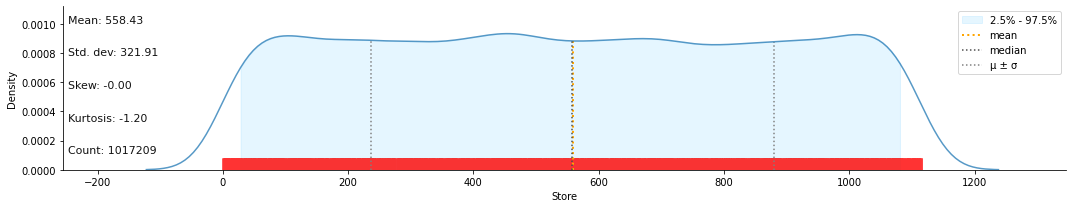

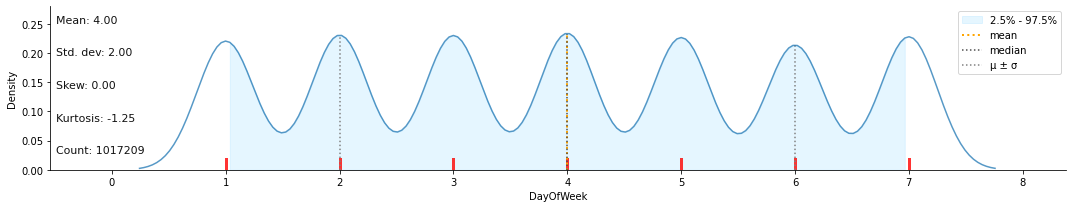

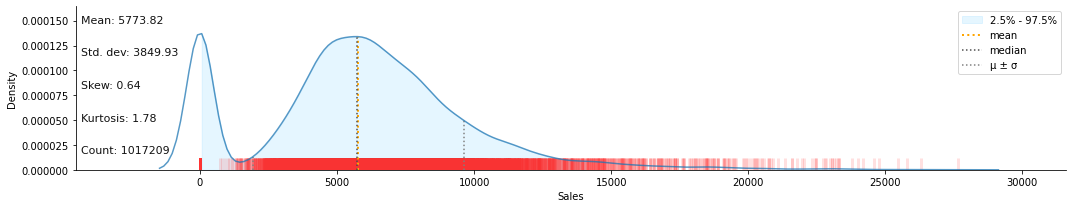

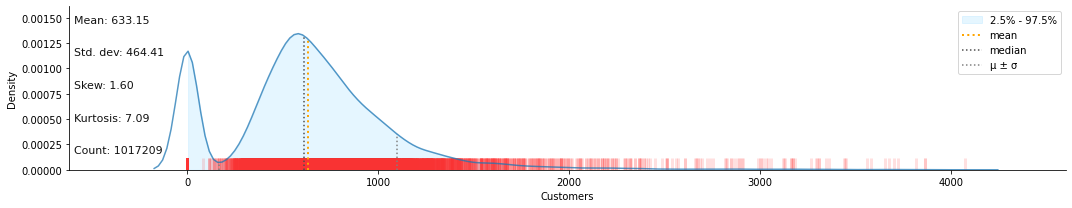

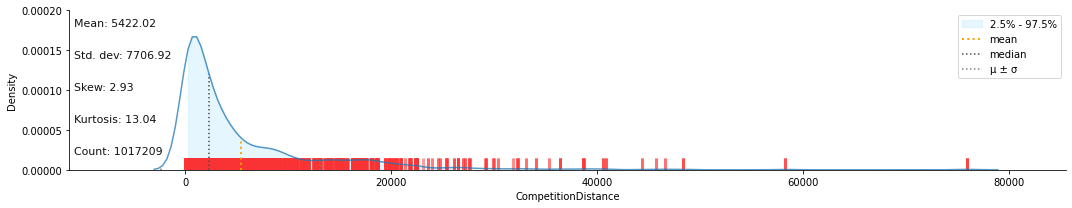

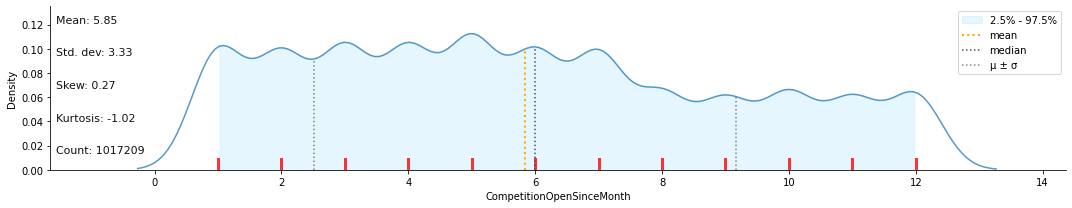

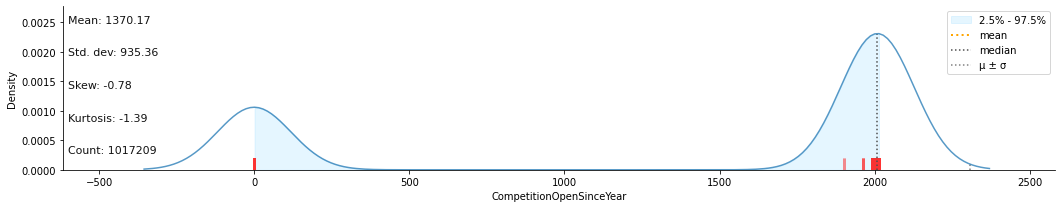

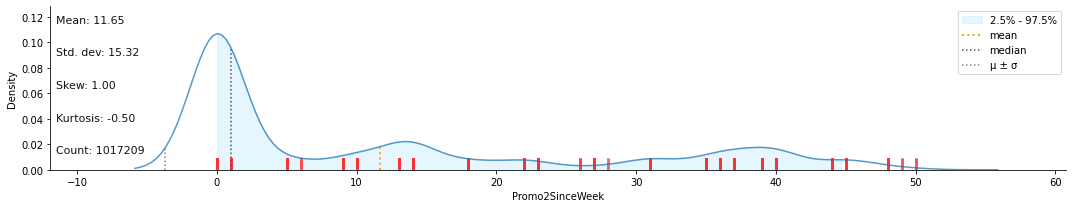

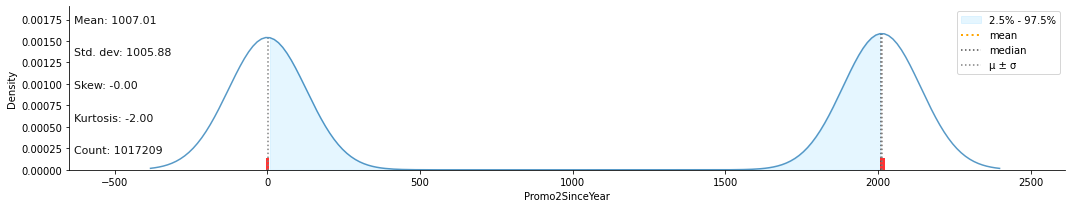

In [ ]:
# Density visualization of Numerical Columns
klib.dist_plot(Ross_store)

Density Distribution & Stastastical Representaion Of Numerical Columns.

#### Chart - 2- Dependant Variable - Sales

In [ ]:
# value counts of dependant variable sales
Ross_store.Sales.value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

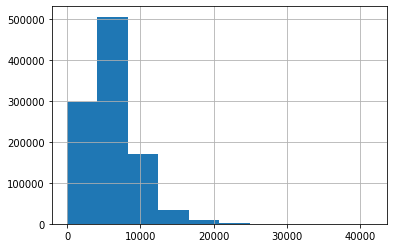

In [ ]:
# analysis od Dependant variable
pd.Series(Ross_store['Sales']).hist()
plt.show()

Graphical Representaton Of Sales cloumn.

#### Chart - 3- StoreType(Univariate)

In [ ]:
# unique values of StoreType
Ross_store.StoreType.value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

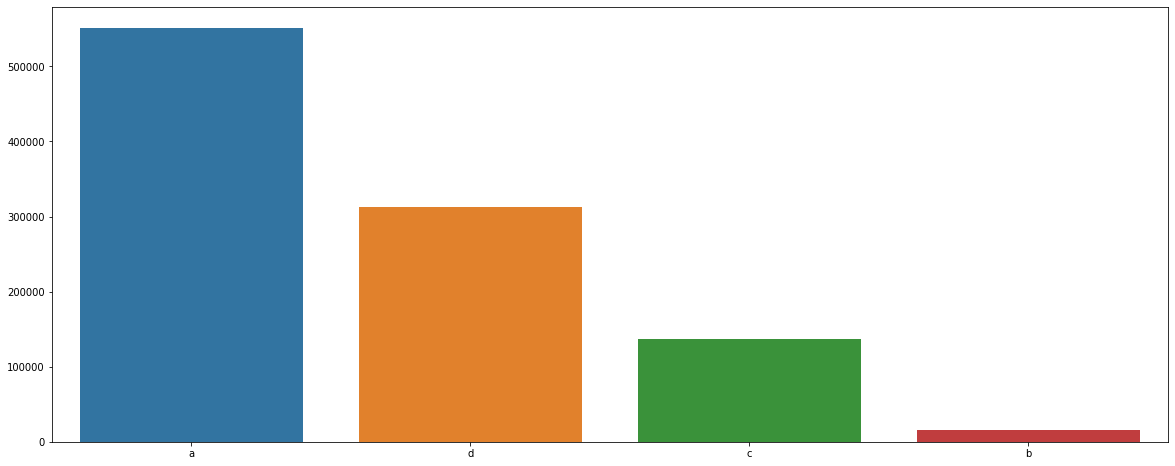

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(20,8))
sns.barplot(y=Ross_store['StoreType'].value_counts().values,x=Ross_store['StoreType'].value_counts().index) 

Bar charts are commonly used to display frequency distributions, which show the number of observations for each category or group.

To show the store_type total counts, I have used Bar Chart.

After creating visualization ,I found that A store count is greater as compared to D,C,B(DESC) stores.

#### Chart - 4 - BarPlot: Promo-interval Frequecy(Univariate)

In [ ]:
# unique values of promointerval
Ross_store.PromoInterval.value_counts()

0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

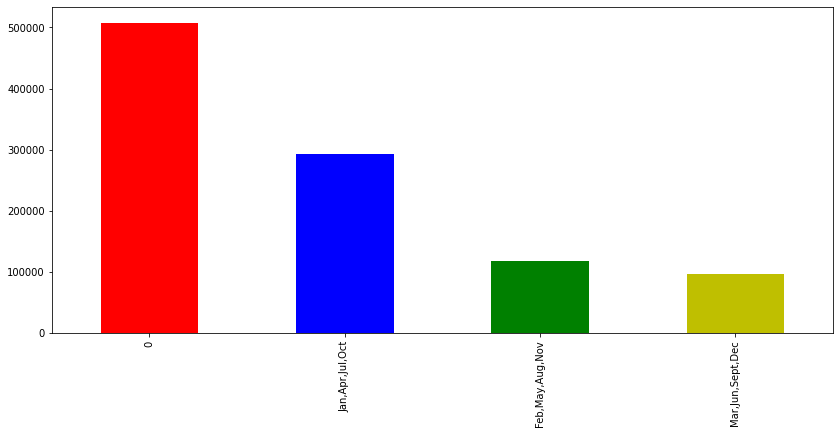

In [ ]:
# figure size
plt.figure(figsize=(14,6))
#BarPlot PromoInterval
Ross_store.PromoInterval.value_counts().plot.bar(color=['r','b','g','y'])

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

To show the Promointerval total counts, I have used Bar Chart.

After creating visualization ,I found that lot's of store are not participate.After that i found jan,Apr,Jul,Oct are most Busy months as compared to feb,May,Aug,Nov & Mar,Jun,Sep,Dec.

#### Chart - 5- Assortment(Univariate)

In [ ]:
# unique values of Assortment
Ross_store.Assortment.value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

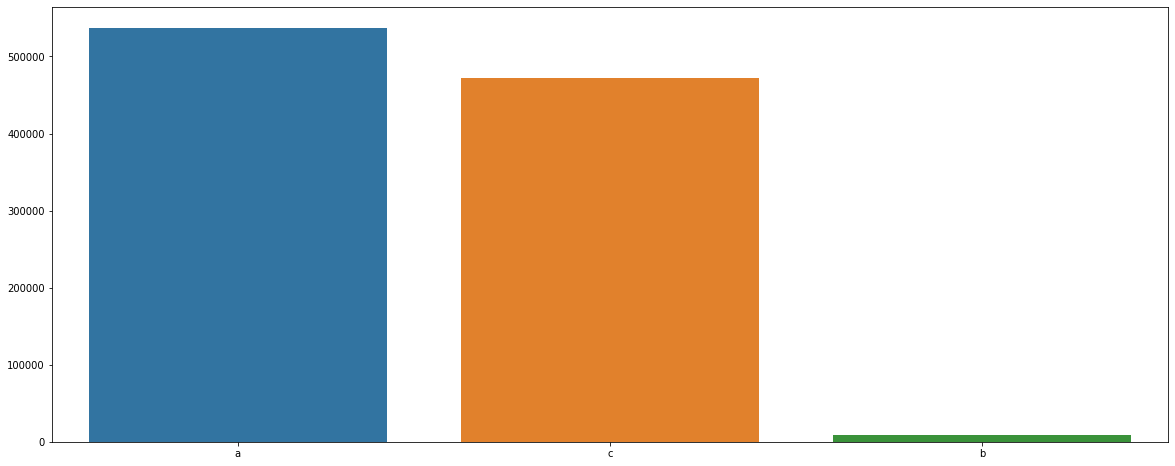

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(20,8))
sns.barplot(y=Ross_store['Assortment'].value_counts().values,x=Ross_store['Assortment'].value_counts().index) 

Bar charts are commonly used to display frequency distributions, which show the number of observations for each category or group.

After creating visualization ,I found that Basic Assortment (a) is higher as compared to extra(b) & extended(c).

#### Chart - 6 - BarPlot: Sales with StoreTypes (Bivariate)

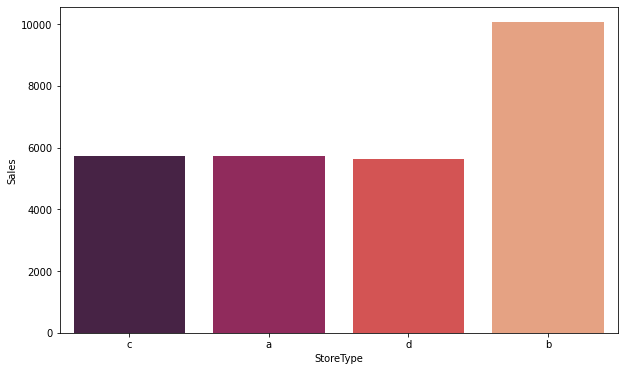

In [ ]:
# figure size
plt.figure(figsize=(10,6))
# SeaBar plot
sns.barplot(x='StoreType',y='Sales',data=Ross_store,palette='rocket',ci=None)
plt.show()

The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time.


After creating visualization ,I found that B store sales is much more than store (a),store(b),store(c). Store(b) sales is Almost Double.

#### Chart - 7 - BarPlot:  Sales with  StateHoliday(Bivariate)

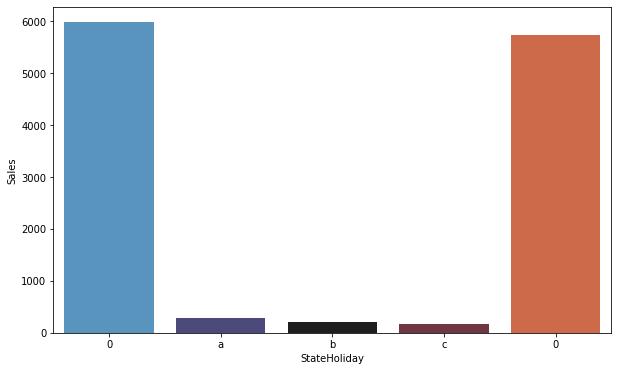

In [ ]:
# figure size
plt.figure(figsize=(10,6))
# SeaBar plot
sns.barplot(x='StateHoliday',y='Sales',data=Ross_store,palette='icefire',ci=None)
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that most of the stores remain closed during StatHolidays.

#### Chart - 8 - BarPlot: Sales with SchoolHoliday(Bivariate)

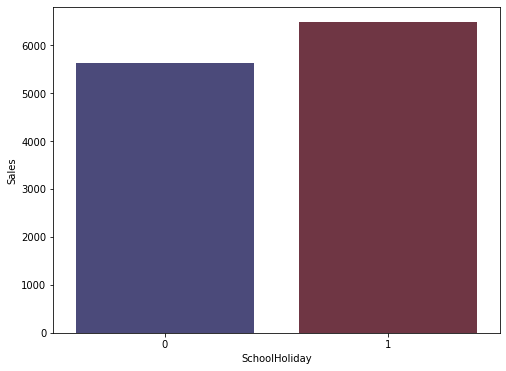

In [ ]:
# figure size
plt.figure(figsize=(8,6))
# SeaBar plot
sns.barplot(x='SchoolHoliday',y='Sales',data=Ross_store,palette='icefire',ci=None)
plt.show()

Bar charts are a versatile data visualization tool that can be used to effectively communicate and compare data, highlight patterns and make data more accessible to a wide audience.

After creating visualization ,I found that During School Holidays were more than that were opened during State Holidays. Another important thing is that the stores which were opened during School holidays had more sales than normal day.

#### Chart - 9 - PointPlot: Sales & DayofWeek(Bivariate)

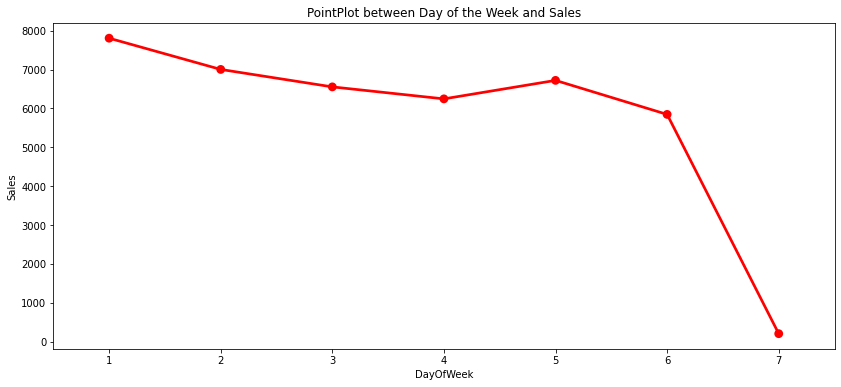

In [ ]:
#figure size
plt.figure(figsize=(14,6))
#pointplot between Day of the Week and Sales
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=Ross_store,color='red')#,palette='rocket')
plt.title('PointPlot between Day of the Week and Sales')
plt.show()

 Line plots are simple and easy to understand, making them a good choice for displaying data to a general audience.

 After creating visualization ,I found that maximum sales is on Monday to friday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost zero as on sunday maximum stores are closed.

#### Chart - 10 - PointPlot: Sales & CompetitionOpenSinceMonth(Bivariate)

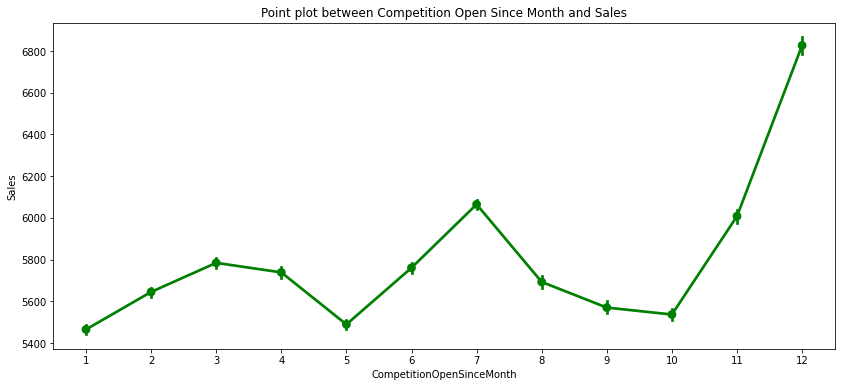

In [ ]:
#figure size
plt.figure(figsize=(14,6))
#Point plot between Competition Open Since Month and Sales
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=Ross_store,color='green')
plt.title('Point plot between Competition Open Since Month and Sales')
plt.show()

Line plots are particularly useful for displaying time-series data, as they allow you to see patterns and trends over time.

After creating visualization ,I found that Sales after month november increases drastically. This is very clear that in December month due to Christmas Eve and New year celebration everone is buying things. So sales of Rossmann store is very high in December month.

#### Chart - 11- PointPlot: Sales & Competition Open Since year(Bivariate)

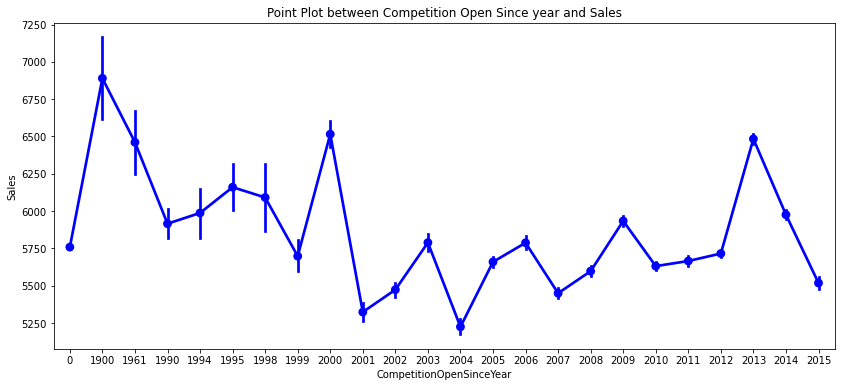

In [ ]:
#figure size
plt.figure(figsize=(14,6))
#Point Plot between Competition Open Since year and Sales
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=Ross_store,color='blue')
plt.title('Point Plot between Competition Open Since year and Sales')
plt.show()

Line plots are good at showing trends in data over time. They can be used to show patterns like seasonality, cyclical patterns, and trends.


After creating visualization ,I found that there are very less store were operated of Rossmann store so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

#### Chart - 12 - PointPlot: Sales & Promo2 Since year(Bivariate)

Text(0.5, 1.0, 'Point Plot between Promo2 Since year and Sales')

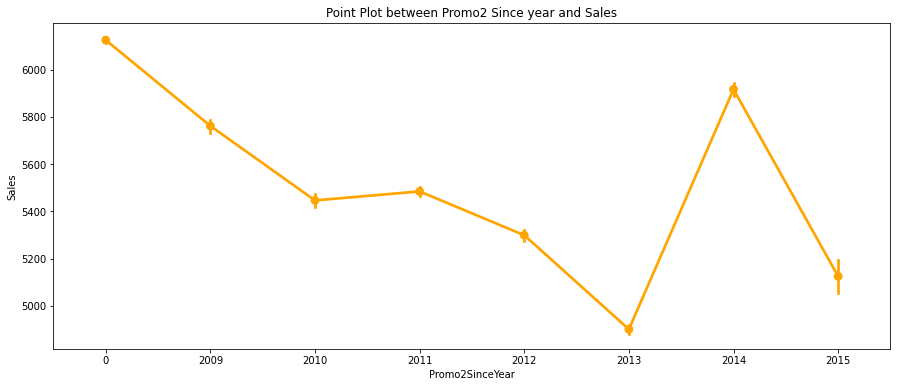

In [ ]:
#figure size
plt.figure(figsize=(15,6))
# Point Plot between Promo2 Since year and Sales
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=Ross_store,color='orange')
plt.title('Point Plot between Promo2 Since year and Sales')

Line plots are often used in time-series forecasting to visualize historical data and predicted values.

After creating visualization ,I found that  Promo2sinceyear has very good effect on sales but in year 2013 sales be less and also in year 2012 and 2015 sales are very low.

#### Chart - 13 - Promo VS Dependant Variable - Sales (Bivariate)

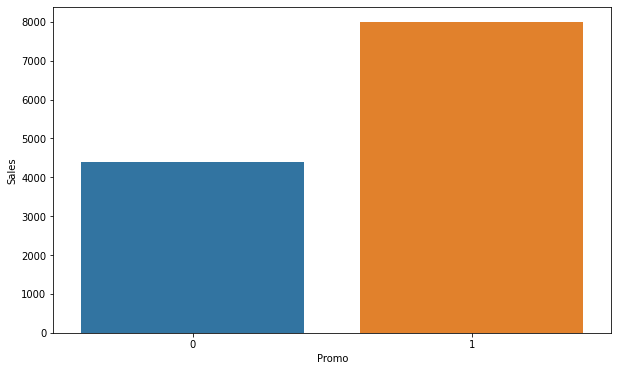

In [ ]:
#figure size
plt.figure(figsize=(10,6))
#Seabar plot
sns.barplot(x="Promo", y="Sales", data=Ross_store,ci=None)
plt.show()

Bar charts can be used in various ways, such as stacked, grouped or overlapped, giving flexibility to represent data in different ways.

 Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. So,After creating visualization ,I found that those store who took promotions their sales are high as compared to stores who didnt took promotion.

#### Chart - 14- StoreType VS Assortment(Bivariate)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


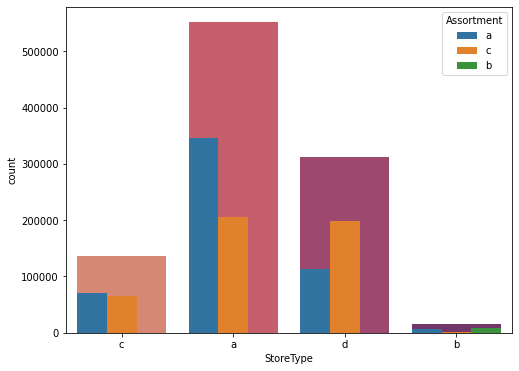

In [ ]:
#figure size
fig, ax=plt.subplots(figsize=(8,6))
#countplot
sns.countplot(Ross_store.StoreType,ax=ax,palette='flare')
sns.countplot(Ross_store.StoreType,hue=Ross_store.Assortment,ax=ax,palette='tab10')
plt.show()

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that  most of the stores have either a assortment type or c assortment type. Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.

#### Chart - 15 - SubPlot- StoreType(Multi-variate)

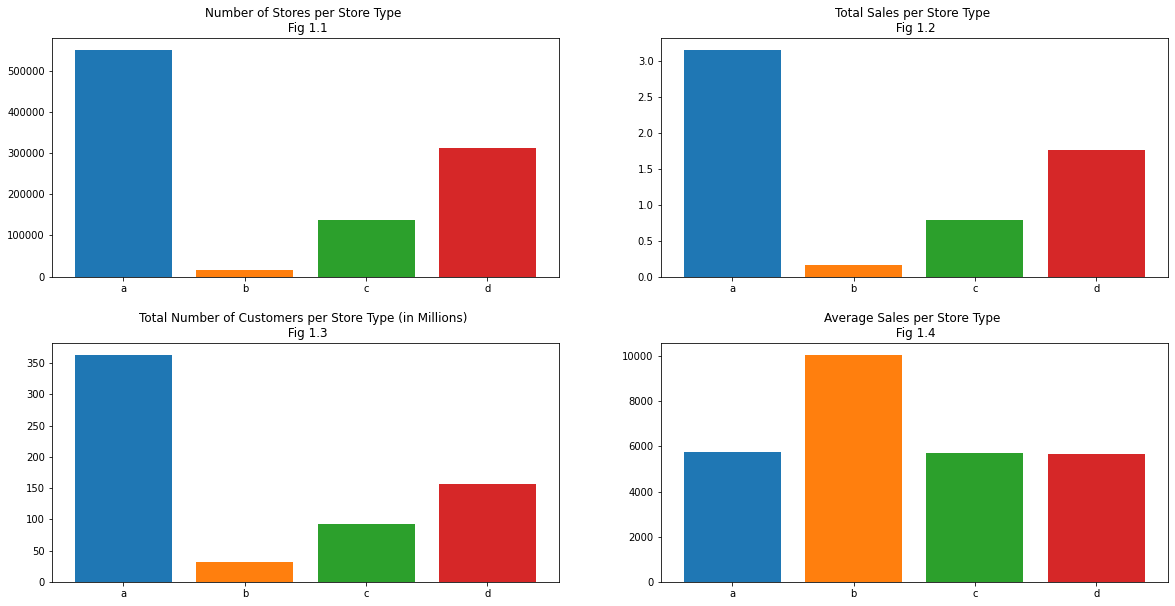

In [ ]:
# subplot
import itertools
fig, axes = plt.subplots(2, 2,figsize=(20,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(Ross_store.groupby(by="StoreType").count().Store.index ,Ross_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(Ross_store.groupby(by="StoreType").sum().Store.index,Ross_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(Ross_store.groupby(by="StoreType").sum().Customers.index,Ross_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(Ross_store.groupby(by="StoreType").sum().Customers.index,Ross_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

SubPlots allows you to display multiple plots side by side, which makes it easier to compare the different plots and identify patterns or trends.

After creating visualization ,I found that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But when looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.

#### Chart - 16 - Correlation Heatmap

In [ ]:
# creating Ross_store.corr for Heatmap
cor=Ross_store.corr()
cor

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026451,0.001467,-0.008794,0.008488,0.011053,0.008520
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,-0.005362,0.000007,0.000168,0.000208,0.000168
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.018869,0.048768,0.002749,-0.091040,-0.044143,-0.091056
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102362,0.038179,0.000489,-0.150159,-0.098323,-0.150138
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007987,-0.000681,-0.001144,-0.008309,-0.007436,-0.008308
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000140,-0.011747,-0.000034,-0.000983,-0.001210,-0.000983
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003666,0.103282,-0.001801,-0.006909,-0.006679,-0.006912
CompetitionDistance,-0.026451,-0.000025,-0.018869,-0.102362,0.007987,0.000140,-0.003666,1.000000,0.003614,-0.001360,-0.139227,-0.122924,-0.139291
CompetitionOpenSinceMonth,0.001467,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,0.003614,1.000000,-0.000897,-0.025323,-0.031188,-0.025329
CompetitionOpenSinceYear,-0.008794,0.000007,0.002749,0.000489,-0.001144,-0.000034,-0.001801,-0.001360,-0.000897,1.000000,-0.097433,-0.124378,-0.097363


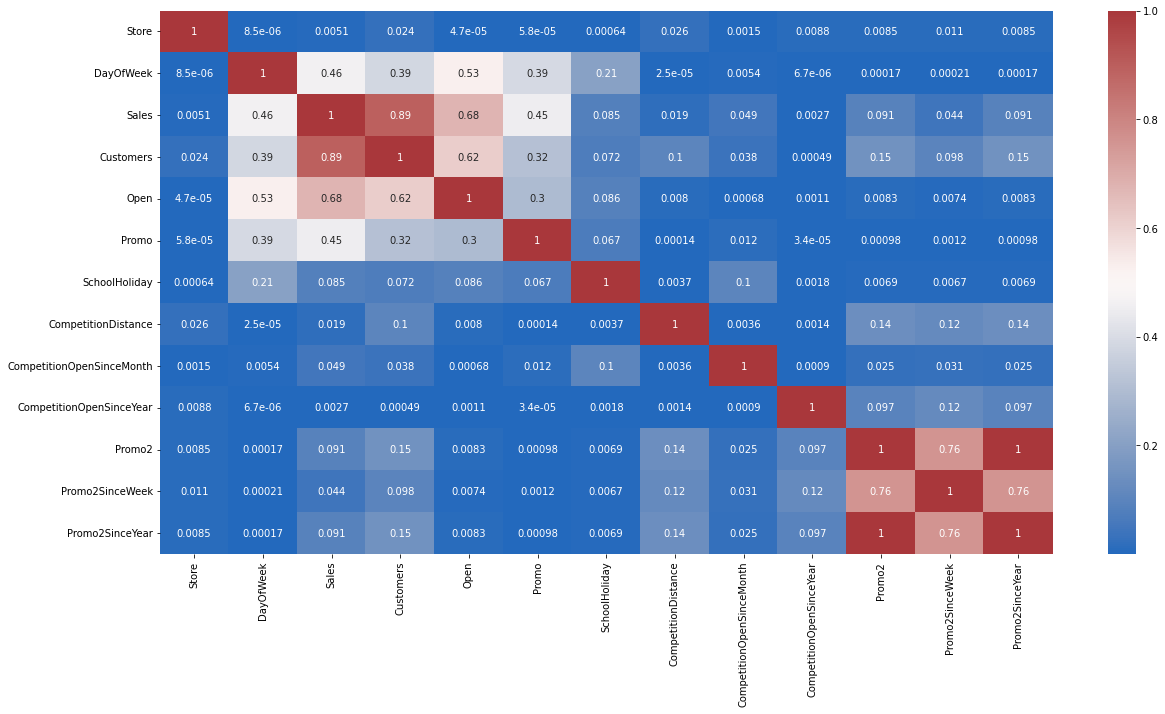

In [ ]:
#figure size
plt.figure(figsize=(20,10))
#heatmap for cor
sns.heatmap(abs(cor),annot= True,cmap='vlag')


 Heatmaps are effective in comparing multiple variables at once. They make it easy to identify patterns and relationships between variables, such as how two variables change together.  heatmaps are a powerful data visualization tool that can be used to effectively identify patterns



#### Chart - 17 - Pair Plot

<Figure size 1080x576 with 0 Axes>

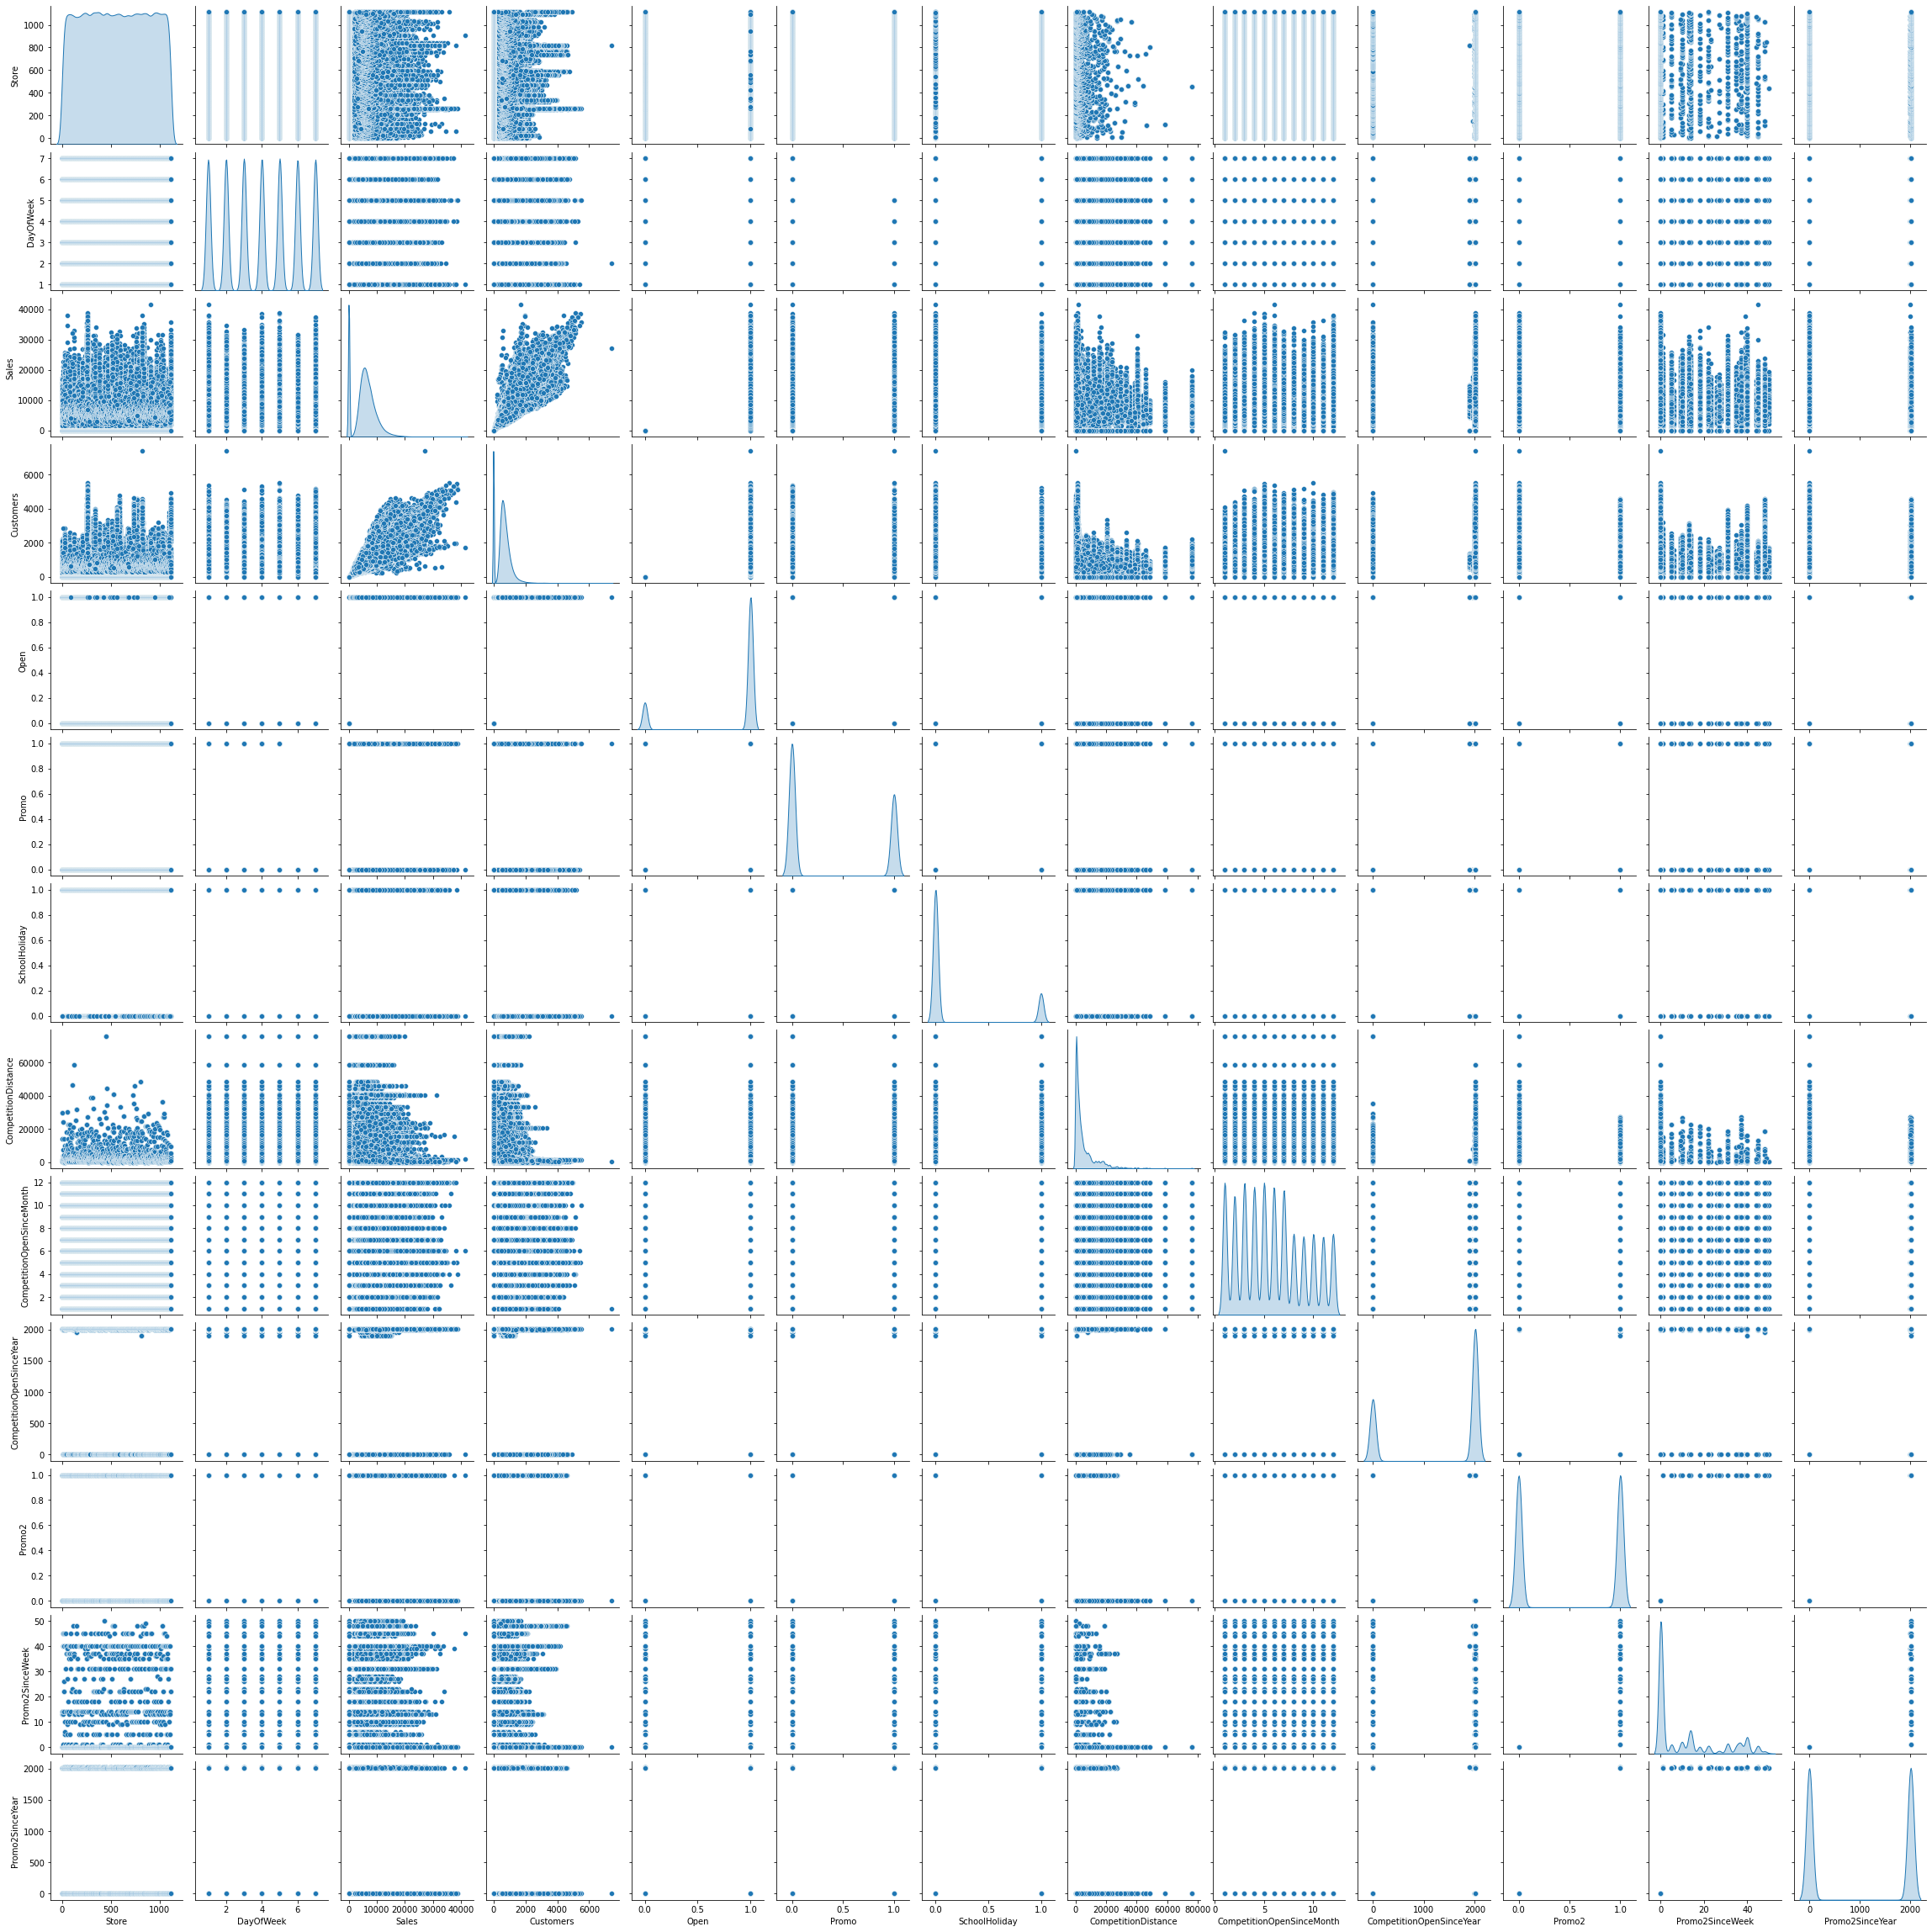

In [ ]:
#figure size
plt.figure(figsize=(15,8))
#pairplot
pairplot=sns.pairplot(Ross_store,diag_kind='kde')

Pairplots can be used to quickly explore the relationship between multiple variables in a dataset. They make it easy to identify patterns and relationships between variables, such as how two variables change together. They can help identify patterns, correlations, and outliers in the data, and can be useful in identifying the most important variables that contribute to variations in the data.

## ***5. Feature Engineering & Data Pre-processing***

### Multicollinearity (VIF)

In [ ]:
#import variance_inflation_factor from statsmodels.stats.outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF Facter
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#dataframe
calc_vif(Ross_store[[i for i in Ross_store.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.649654e+00
1,DayOfWeek,3.937851e+00
2,Customers,5.097057e+00
3,Open,8.499050e+00
4,Promo,1.898611e+00
5,SchoolHoliday,1.258592e+00
6,CompetitionDistance,1.534425e+00
7,CompetitionOpenSinceMonth,3.780632e+00
8,CompetitionOpenSinceYear,2.946298e+00
9,Promo2,1.568489e+06


All feature VIF values below 10. That means all columns are stable.

### Categorical Encoding

In [ ]:
# changing StateHoliday datatype from object to int in Ross_store dataset
Ross_store.loc[Ross_store['StateHoliday'] == '0', 'StateHoliday'] = 0
Ross_store.loc[Ross_store['StateHoliday'] == 'a', 'StateHoliday'] = 1
Ross_store.loc[Ross_store['StateHoliday'] == 'b', 'StateHoliday'] = 2
Ross_store.loc[Ross_store['StateHoliday'] == 'c', 'StateHoliday'] = 3
Ross_store['StateHoliday'] = Ross_store['StateHoliday'].astype(int, copy=False)

print('levels :', Ross_store['StateHoliday'].unique(), '; data type :', Ross_store['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# changing Assortment datatype from object to int in Ross_store dataset
Ross_store.loc[Ross_store['Assortment'] == 'a', 'Assortment'] = 0
Ross_store.loc[Ross_store['Assortment'] == 'b', 'Assortment'] = 1
Ross_store.loc[Ross_store['Assortment'] == 'c', 'Assortment'] = 2
Ross_store['Assortment'] = Ross_store['Assortment'].astype(int, copy=False)

print('levels :', Ross_store['Assortment'].unique(), '; data type :', Ross_store['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [ ]:
# changing StoreType datatype from object to int in Ross_store dataset
Ross_store.loc[Ross_store['StoreType'] == 'a', 'StoreType'] = 0
Ross_store.loc[Ross_store['StoreType'] == 'b', 'StoreType'] = 1
Ross_store.loc[Ross_store['StoreType'] == 'c', 'StoreType'] = 2
Ross_store.loc[Ross_store['StoreType'] == 'd', 'StoreType'] = 3
Ross_store['StoreType'] = Ross_store['StoreType'].astype(int, copy=False)

print('levels :', Ross_store['StoreType'].unique(), '; data type :', Ross_store['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


### Analysis on Sales - Dependent variable

In [ ]:
# size of Ross_store
Ross_store[(Ross_store.Open == 0) & (Ross_store.Sales == 0)].count()[0]

172817

 We see that **172817** times store is were temporarily closed for refurbishment. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

In [ ]:
df_1 = Ross_store.drop(Ross_store[(Ross_store.Open == 0) & (Ross_store.Sales == 0)].index)
df_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


PromoInterval to be changed into dummies as it is categorical feature.

In [ ]:
#PromoInterval
df_1 = pd.get_dummies(df_1, columns=['PromoInterval'])

In [ ]:
df_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


#### Import TRAINING Models

In [ ]:
from scipy.stats import zscore
#-----------------------------------------------------------------------#
from sklearn.linear_model import Lasso, Ridge
#-----------------------------------------------------------------------#
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------#
from sklearn.preprocessing import StandardScaler
#-----------------------------------------------------------------------#
from sklearn.linear_model import LinearRegression
#-----------------------------------------------------------------------#
from sklearn.pipeline import Pipeline
#-----------------------------------------------------------------------#
from sklearn.tree import DecisionTreeRegressor
#-----------------------------------------------------------------------#
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
#-----------------------------------------------------------------------#
import math
#-----------------------------------------------------------------------#
from sklearn.ensemble import RandomForestRegressor
#-----------------------------------------------------------------------#
import lightgbm as lgb
#-----------------------------------------------------------------------#
from sklearn.metrics import r2_score
#-----------------------------------------------------------------------#
from sklearn.metrics import confusion_matrix,classification_report
#-----------------------------------------------------------------------#
from sklearn.metrics import mean_squared_error
#-----------------------------------------------------------------------#

###  Data Splitting

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(df_1.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
# dependant 
dependent_variables

'Sales'

In [ ]:
# in-dependant
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
# Create the data of independent variables
X = df_1[independent_variables].values

# Create the data of dependent variable
y = df_1[dependent_variables].values

In [ ]:
# splitting the dataset in train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
# having a glance of the data
print(X_train)

[[ 853    4 1012 ...    0    0    0]
 [ 527    1 1088 ...    0    0    0]
 [ 624    2  759 ...    0    0    0]
 ...
 [ 925    3 1044 ...    0    1    0]
 [ 505    1  769 ...    1    0    0]
 [ 572    3  500 ...    0    1    0]]


In [ ]:
## having a glance of the data
print(y_train)

[ 8982 12279  8241 ...  4817  6194  5862]


In [ ]:
## having a glance of the data
print(X_test)

[[ 231    6  460 ...    1    0    0]
 [  56    2  430 ...    0    0    1]
 [ 229    4  696 ...    0    1    0]
 ...
 [ 129    1 1043 ...    0    1    0]
 [ 589    1  812 ...    1    0    0]
 [  81    4  318 ...    0    1    0]]


In [ ]:
## having a glance of the data
print(y_test)

[5495 5472 7969 ... 9214 9035 3591]


In [ ]:
#shape of Dataset
print(X_train.shape)
print(X_test.shape)

(591074, 18)
(253318, 18)


## ***6. ML Model Implementation***

## MODEL A:-

### Model 1: Linear Regression

In [ ]:
# fit the model and store in new variable
lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# calculate model linear regression score
lin_reg.score(X_train, y_train)

0.7635505732744505

In [ ]:
#coef
lin_reg.coef_

array([-1.62303946e-01, -6.86571875e+01,  6.36153752e+00,  1.53450586e-11,
        1.29400555e+03, -1.23774905e+03,  3.66211696e+01,  2.77496616e+02,
        2.22231384e+02,  2.90111871e-02,  2.97972709e+01,  8.53761979e-02,
       -4.38260524e+01,  1.25837615e+01,  4.38260524e+01,  3.04170206e+01,
        1.38605863e+02, -2.12848936e+02])

In [ ]:
#intercept
lin_reg.intercept_

693.8291405227765

In [ ]:
# predict the model
y_pred = lin_reg.predict(X_test)
y_pred

array([5327.03879309, 4852.4276321 , 7242.58368251, ..., 9061.2514492 ,
       7716.74896273, 3297.39829026])

In [ ]:
#predict
y_pred_train = lin_reg.predict(X_train)
y_pred_train

array([ 7385.17901118, 10535.53453011,  7557.57648929, ...,
        7915.90550495,  6878.29187276,  6126.9865774 ])

In [ ]:
y_test

array([5495, 5472, 7969, ..., 9214, 9035, 3591])

In [ ]:
y_train

array([ 8982, 12279,  8241, ...,  4817,  6194,  5862])

In [ ]:
#MSE
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

MSE : 2266295.521725346


In [ ]:
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSE : 1505.4220410653438


In [ ]:
#R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7634204100230513


### Model 2: LASSO Regression

In [ ]:
lasso_df = Lasso(alpha = 0.2, max_iter=10000)

In [ ]:
#fit
lasso_df.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
#predict
y_pred_lasso_df = lasso_df.predict(X_test)

In [ ]:
#Score
lasso_df.score(X_test, y_test)

0.7634126468007094

In [ ]:
#dataframe
pd.DataFrame(zip(y_test, y_pred_lasso_df), columns = ['actual', 'pred'])

,actual,pred
0,5495,5328.081064
1,5472,4855.543226
2,7969,7242.555865
3,7384,6083.182214
4,13212,7832.330431
...,...,...
253313,8528,10431.881033
253314,5671,6051.082758
253315,9214,9059.615191
253316,9035,7718.481089


### Model 3 : RIDGE Regression

In [ ]:
ridge_df = Ridge(alpha = 0.5)

In [ ]:
#fit
ridge_df.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
#predict
ridge_df.predict(X_test)

array([5327.03965192, 4852.43226909, 7242.58414996, ..., 9061.24744567,
       7716.74715557, 3297.40069136])

In [ ]:
ridge_df.predict(X_test)

array([5327.03965192, 4852.43226909, 7242.58414996, ..., 9061.24744567,
       7716.74715557, 3297.40069136])

In [ ]:
#Score
ridge_df.score(X_test, y_test)

0.763420375817236

### Model 4: DECISION TREE

In [ ]:
decision_tree_df=DecisionTreeRegressor(max_depth=5)

In [ ]:
#fit
decision_tree_df.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
#predict
y_pred_dt = decision_tree_df.predict(X_test)

In [ ]:
y_train_dt = decision_tree_df.predict(X_train)

In [ ]:
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

MSE : 2002912.116660656


In [ ]:
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSE : 1415.242776579572


In [ ]:
#mean
sales_mean=Ross_store[dependent_variables].mean()

In [ ]:
#RMPSE
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)


RMPSE : 0.24511381173671248


In [ ]:
#R2
r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

R2 : 0.7909151199492743


### Model 5: Random Forest

In [ ]:
# Random forest
random_forest_df=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest_df.fit(X_train, y_train)
y_pred_rf=random_forest_df.predict(X_test)
MSE  = mean_squared_error(y_test, y_pred_rf)
#MSE
print("MSE :" , MSE)
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#RMPSE
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)
#R2
r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,r2)

MSE : 1248281.825213996
RMSE : 1117.2653333984708
RMPSE : 0.19350543180475333
R2 : 0.8696913092075579


## MODEL B:-

In Model B i take Whole Dataset. let's go

### Data Spliting

Use dummy variables for the column 'PromoInterval'

In [ ]:
#dummy variables
Ross_store = pd.get_dummies(Ross_store, columns=['PromoInterval'])

In [ ]:
#head
Ross_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


Define independent and dependent variables and convert them into arrays

In [ ]:
# defining dependent variable
dep_var_df = 'Sales'

# defining independent variable
indep_var_df = Ross_store.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
# Create the data of independent variables
A = Ross_store[indep_var_df].values

# Create the dependent variable data
B = Ross_store[dep_var_df].values

In [ ]:
#dependant
Ross_store[dep_var_df]

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 1017209, dtype: int64

In [ ]:
#independant
Ross_store[indep_var_df]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


###  Data Splitting

In [ ]:
# splitting the dataset
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.35, random_state = 0)

In [ ]:
print(A_train)

[[  7   0   0 ...   0   0   0]
 [  2 709   1 ...   0   0   0]
 [  7   0   0 ...   0   0   0]
 ...
 [  5 755   1 ...   0   1   0]
 [  6 355   1 ...   0   0   0]
 [  2 689   1 ...   0   0   0]]


In [ ]:
print(B_train)

[   0 7616    0 ... 7404 2864 5541]


In [ ]:
print(A_test)

[[   5  955    1 ...    0    0    0]
 [   3 1563    1 ...    0    0    0]
 [   1 1107    1 ...    0    0    0]
 ...
 [   5  395    1 ...    0    0    0]
 [   3  598    1 ...    0    0    1]
 [   1  417    1 ...    0    1    0]]


In [ ]:
print(B_test)

[7285 6221 8132 ... 4236 5214 6609]


In [ ]:
#shape
print(A_train.shape)
print(B_test.shape)

(661185, 17)
(356024,)


### Scaling Data

In [ ]:
# scling the x values
scaler=StandardScaler()

A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

### Model 1: Linear Regression

In [ ]:
# fitting the data into Lineat Regression Model
linear_reg_df = LinearRegression()
linear_reg_df.fit(A_train, B_train)

LinearRegression()

In [ ]:
#predict
B_pred=linear_reg_df.predict(A_test)
B_pred

array([ 7093.91859728, 12610.47694689,  9195.16676623, ...,
        4813.84193713,  7033.02571398,  6366.34437853])

In [ ]:
#Score
linear_reg_df.score(A_train, B_train)

0.8677492603057884

In [ ]:
#dataframe
regression_df = pd.DataFrame(zip(B_test, B_pred), columns = ['actual', 'pred'])
regression_df

,actual,pred
0,7285,7093.918597
1,6221,12610.476947
2,8132,9195.166766
3,20916,11532.595721
4,5472,6600.741595
...,...,...
356019,5323,5363.869464
356020,6288,6624.338763
356021,4236,4813.841937
356022,5214,7033.025714


In [ ]:
#mean
sales_mean=Ross_store[dep_var_df].mean()

In [ ]:
#import mean squared error
from sklearn.metrics import mean_squared_error
#MSE
MSE  = mean_squared_error(B_test, B_pred)
print("MSE :" , MSE)
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#RMPSE
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)
#R2
r2 = r2_score(B_test, B_pred)
print("R2 :" ,r2)

MSE : 1947051.1809246147
RMSE : 1395.3677583076853
RMPSE : 0.24167154616392297
R2 : 0.8682493997233306


### Model 2: Lasso Regression

In [ ]:
# lasso regression
lasso_df_1 = Lasso(alpha = 2.0)

In [ ]:
#fit
lasso_df_1.fit(A_train, B_train)

Lasso(alpha=2.0)

In [ ]:
#predict
B_pred_lasso = lasso_df_1.predict(A_test)

In [ ]:
lasso_df_1.score(A_train, B_train)

0.8677453493409767

In [ ]:
#MSE
MSE  = mean_squared_error(B_test, B_pred_lasso)
print("MSE :" , MSE)
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#RMPSE
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)
#R2
r2 = r2_score(B_test, B_pred_lasso)
print("R2 :" ,r2)

MSE : 1947079.5151035015
RMSE : 1395.377911213841
RMPSE : 0.24167330460252387
R2 : 0.8682474824418984


### Model 3: Ridge Regression

In [ ]:
#ridge regression
ridge_df_1 = Ridge(alpha = 0.5)

In [ ]:
#fit
ridge_df_1.fit(A_train, B_train)

Ridge(alpha=0.5)

In [ ]:
#predict
B_pred_rid=ridge_df_1.predict(A_test)

In [ ]:
#score
ridge_df_1.score(A_test, B_test)

0.8682493983187305

In [ ]:
#MSE
MSE  = mean_squared_error(B_test, B_pred_rid)
print("MSE :" , MSE)
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#RMPSE
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)
#R2
r2 = r2_score(B_test, B_pred_rid)
print("R2 :" ,r2)

MSE : 1947051.2016822302
RMSE : 1395.36776574573
RMPSE : 0.2416715474521595
R2 : 0.8682493983187305


### Model 4: Decision Tree

In [ ]:
# decision tree
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(A_train, B_train)
B_pred_dt = decision_tree.predict(A_test)
B_train_dt = decision_tree.predict(A_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(B_test, B_pred_dt)
print("MSE :" , MSE)
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#RMPSE
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)
#R2
r2 = r2_score(B_test, B_pred_dt)
print("R2 :" ,r2)


MSE : 1941833.527406431
RMSE : 1393.496870253547
RMPSE : 0.2413475165982036
R2 : 0.8686024613119478


In [ ]:
#dataframe
decisiontree_df= pd.DataFrame(zip(B_test, B_pred_dt), columns = ['actual', 'pred'])
decisiontree_df

,actual,pred
0,7285,8906.736095
1,6221,10372.404819
2,8132,8906.736095
3,20916,11586.188373
4,5472,5374.344677
...,...,...
356019,5323,6333.457110
356020,6288,5374.344677
356021,4236,4235.145450
356022,5214,5374.344677


### Model 5: Random Forest

In [ ]:
#random forest
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(A_train, B_train)
B_pred_rf=random_forest.predict(A_test)
MSE  = mean_squared_error(B_test, B_pred_rf)
print("MSE :" , MSE)
#RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#RMPSE
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)
#R2
r2 = r2_score(B_test, B_pred_rf)
print("R2 :" ,r2)

MSE : 1117867.5174927698
RMSE : 1057.2925411128037
RMPSE : 0.18311840848910566
R2 : 0.9243575526404383


In [ ]:
#dataframe
rf_df = pd.DataFrame(zip(B_test, B_pred_rf), columns = ['actual', 'pred'])
rf_df

,actual,pred
0,7285,7020.117479
1,6221,10527.834290
2,8132,9251.084106
3,20916,13938.446647
4,5472,6051.490706
...,...,...
356019,5323,5122.147657
356020,6288,6540.815772
356021,4236,4327.477744
356022,5214,6050.468216


## ***7. Conclusion***

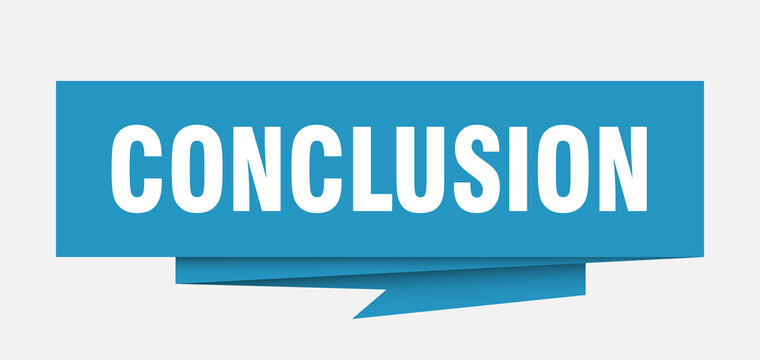

### Model conclusion

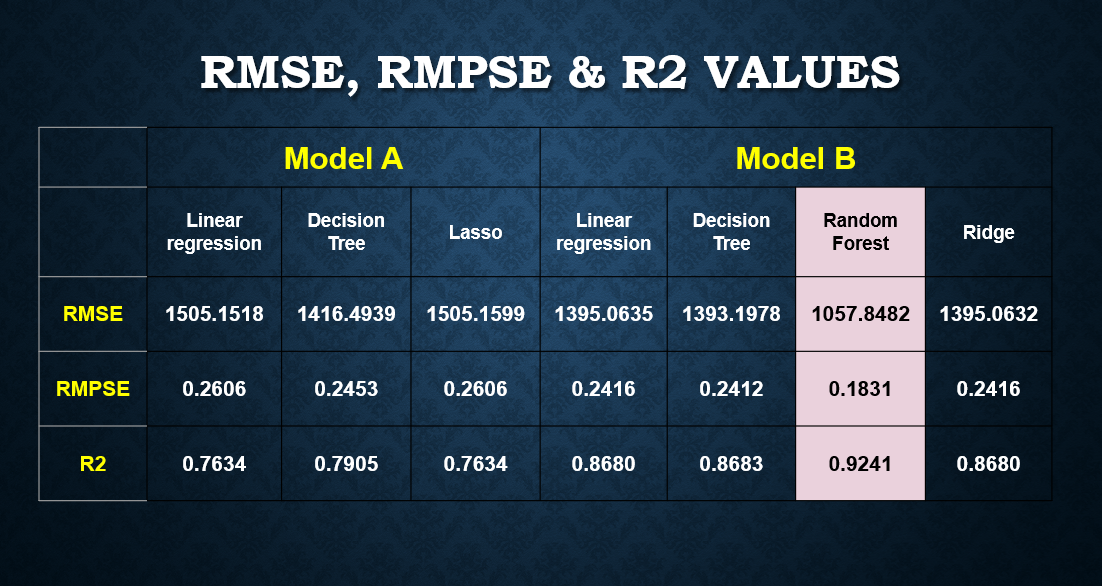

1.	By looking the chart we clearly see that both Model RMSE, RMPSE and R2 values i decided to go with B Model in which took whole dataset are present.
2. If we see the above chart above all algorithms we get very good result in Random Forest Algorithm. 
3. So i decided to choose Random Forest Algorithm of B model.
4. From above table Random Forest has proven to be the most efficient model out of the algorithms used in our model, including Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, and Random Forest

### EDA Conclusion For Business Recommandation

1. 	Plot between Promotion and Sales shows that promotion helps in increasing Sales. 
2. Type of Store plays an important role in opening pattern of stores. All Type ‘b’ stores never closed except for refurbishment or other reason.
3. 	All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.
4. 	Assortment Level ‘b’ is only offered at Store Type ‘b’.
5.	From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
6. From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December. 

### Challenges faced


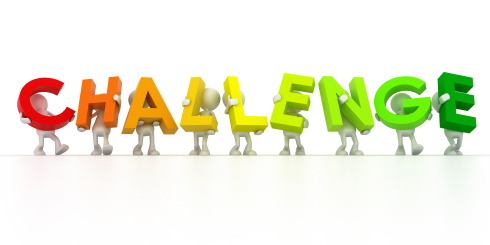


1. Reading the dataset and understanding of Rows & columns.
2.	Some stores were closed. Unable to fill the gap of sales for those stores.
3. Removing outliers is a big challenge.
4. Choosing the right ML models and evaluation metrics.
5. Converting columns with categorical variables to integer type for regression.
6. Choosing right kind of model.


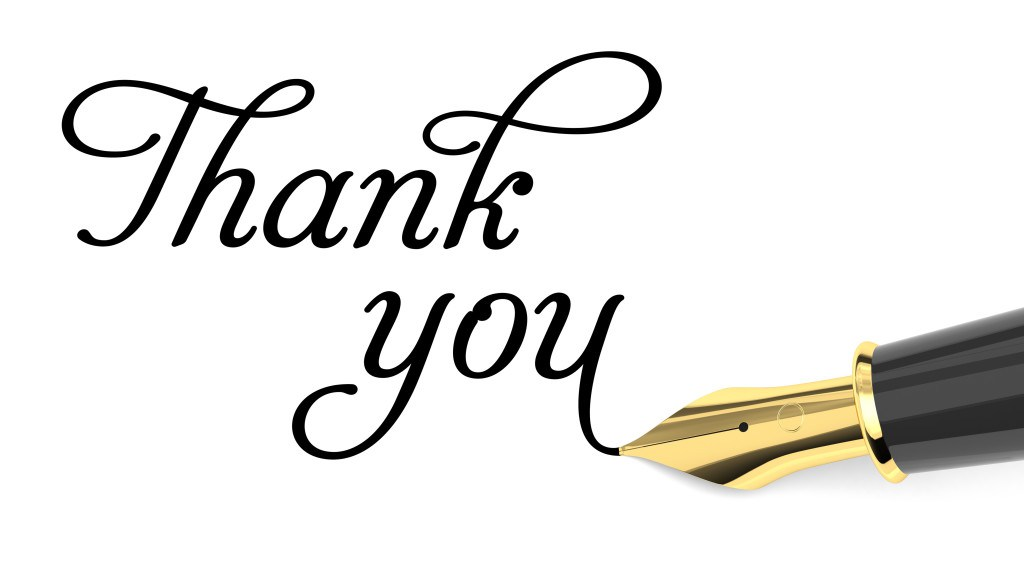